In [ ]:

from IPython.core.display import display, HTML, Javascript

color_map = ['#176BA0', '#19AADE']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s;
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb():
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b>🏬🔧Prédiction des situations de danger <span style="color: #000000"> 📉</span></b><br><span style="color: #19AADE; font-size: 24px">on technician Dataset </span></h1>
<hr>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | <b>Introduction </b>👋</div>
<center>
    <img src="https://th.bing.com/th/id/R.4313f85e2868ff119e1696b76727200e?rik=eljj%2filEukNPPA&pid=ImgRaw&r=0" alt="Mart" width="80%">
</center>
<br>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Set Problems 🤔</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Client is a company which manages the public electricity distribution network over 95% of French territory.<br>
    👉The problem concerns the safety of technicians. The technician works outdoors and must follow a set of procedures regarding the wearing of their PPE (Personal Protective Equipment). You are required to retrieve a set of information of the type opening of jackets, gloves not on, etc. <br>
    👉From this information you will set up a virtual assistant capable of alerting him of his danger.<br>
    👉AI will be the differentiating element to ensure that in any situation the technician will be safe(will wear the necessary and essential protective equipment for the situation). <br>
    <b><mark>The objective is to implement a solution to predict the moments when a technician is in danger during an intervention. </b></mark><br>
    👉 <b>Data pre-processing and feature engineering will be performed to prepare the dataset</b> before it is used by the machine learning model.<br>
    👉Machine learning models are necessary to determine whether a patient has heart disease and speed up the diagnostic process based on the medical information provided about that patient. The variables that most influence a patient to have heart disease will also be explored more deeply in this notebook.
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Objectives of Notebook 📌</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    The objective is to create a self-learning model to alert the technician if he is in danger during an intervention. It is therefore a question of working on unsupervised learning models making it possible to detect periods during which a technician was in danger, i.e. to alert the technician in the event of improper wearing of PPE during the intervention <br>
    👉 <b>This notebook aims to:</b>
    <ul>
        <li> Perform <mark><b>initial data exploration</b></mark>.</li>
        <li> Perform <mark><b>EDA</b></mark>.</li>
        <li> Perform <mark><b>data pre-processing</b></mark>  
    </ul>
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Set Description 🧾</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <b>14 variables</b> in this data set:
    <ul>
        <li> <mark><b> 2 categorical</b></mark> variables,</li>
        <li> <mark><b> 11 numeric </b></mark> variables,</li>
        <li> <mark><b>1</b></mark> <mark><b>  time </b></mark>,
        </li>
        <!-- <li> <mark><b>1</b></mark> variable to accommodate the <mark><b>Outlet identifier (ID)</b></mark>.</li> -->
    </ul><br>
    👉 The following is the <b>structure of the data set</b>.<br>

<table style="width:100%">
<thead>
  <tr>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Column Name</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Data Type</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="font-weight: bold">Scenario</td>
    <td>int</td>
    <td>represent type of intervention (1,2,3..)</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Correct</td>
    <td>Int</td>
    <td>indicates wether the technician wear or no the equipements (port d’un équipement ne dit pas forcement que la variable correcte est en 1)</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Timestamp</td>
    <td>Int</td>
    <td>Indicates the occurence of scenario over the time in second</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Datetime</td>
    <td>Object</td>
    <td>Indicates the occurence of scenario over the time of the day</td>
  </tr>
  <tr>
    <td style="font-weight: bold">t1_casque</td>
    <td>Float</td>
    <td>indicates the technician 1 wear or no helmet <br> 0= not wear <br> 1= wear</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">t1_visiere</td>
    <td>float</td>
    <td>indicates the technician 1 wear or no visior <br> 0= not wear <br> 1= wear</td>
  </tr>
  <tr>
    <td style="font-weight: bold">t1_col</td>
    <td>Float</td>
    <td>indicates the technician 1 wear or no collar <br> 0= not wear <br> 1= wear</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">t1_gant_gauche</td>
    <td>Float</td>
    <td>indicates the technician wear or no left glove <br> 0= not wear <br> 1= wear</td>
  </tr>
  <tr>
    <td style="font-weight: bold">t1_gant_droit</td>
    <td>Float</td>
    <td>indicates the technician 1 wear or no right glove <br> 0= not wear <br> 1= wear</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">danger</td>
    <td>Int</td>
    <td>it's the target to predict whether the technician is in danger or no <b> 0= no danger <br> 1= in danger </td>
  </tr>
</tbody>
</table>


</div>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | <b>Importing Libraries</b> 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as mso

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | <b>Reading Dataset </b>👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [ ]:
# --- Importing Dataset ---
from tqdm.auto import tqdm

# Load the CSV file into a DataFrame
file_path = "/content/data_technicien.csv"
df = pd.read_csv(file_path, encoding='ascii')


# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Scenario,Correct,Timestamp,Datetime,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,t2_casque,t2_visiere,t2_veste,t2_col,danger
1,1,1626949343,7/22/2021 10:22,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0
1,1,1626949359,7/22/2021 10:22,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0
1,1,1626949374,7/22/2021 10:22,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0
1,1,1626949389,7/22/2021 10:23,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0
1,1,1626949405,7/22/2021 10:23,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
  👉From dataset report , it can be concluded that:
 <ul>
    <li>There are 2 technicians t1 and t2 detected in the dataset. it also can be seen that there are values of each variable of technician t1 detected by sensor at the first time .</li>
    <li> As can be seen the target is danger,  we can conclued that is a binary classification</li>
     </ul>
</div>



In [ ]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', df.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
df.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 393
Total Columns: 14
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Scenario        393 non-null    int64  
 1   Correct         393 non-null    int64  
 2   Timestamp       393 non-null    int64  
 3   Datetime        393 non-null    object 
 4   t1_casque       225 non-null    float64
 5   t1_visiere      225 non-null    float64
 6   t1_col          225 non-null    float64
 7   t1_gant_gauche  225 non-null    float64
 8   t1_gant_droit   225 non-null    float64
 9   t2_casque       168 non-null    float64
 10  t2_visiere      168 non-null    float64
 11  t2_veste        168 non-null    float64
 12  t2_col          168 non-null    float64
 13  danger          393 non-null    int64  
dtypes: float64(9), int64(4), obj

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> and <mark><b>393 observations</b></mark> with various data types.<br>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | <b>Initial Data Exploration </b> 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before pre-process the data.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.2 | Descriptive Statistics  🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [ ]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Scenario,Correct,Timestamp,t1_casque,t1_visiere,t1_col,t1_gant_gauche,t1_gant_droit,t2_casque,t2_visiere,t2_veste,t2_col,danger
count,393.000000,393.000000,393.000000,225.000000,225.000000,225.000000,225.000000,225.000000,168.000000,168.000000,168.000000,168.000000,393.000000
mean,2.167939,0.585242,1626536276.249364,0.822222,0.120000,0.115556,0.253333,0.240000,0.601190,0.279762,0.392857,0.541667,0.152672
std,1.424025,0.493308,432199.611987,0.383178,0.325686,0.320404,0.435890,0.428035,0.491117,0.450224,0.489846,0.499750,0.360129
min,1.000000,0.000000,1626084505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1626087802.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1626949436.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1626951220.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,1.000000,1626965782.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.3 | Missing Values Exploration ❓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>missing values exploration for all columns</b>.
</div>

*******************************************
.: Total Missing Values in each Columns :.
*******************************************


Scenario            0
Correct             0
Timestamp           0
Datetime            0
t1_casque         168
t1_visiere        168
t1_col            168
t1_gant_gauche    168
t1_gant_droit     168
t2_casque         225
t2_visiere        225
t2_veste          225
t2_col            225
danger              0
dtype: int64

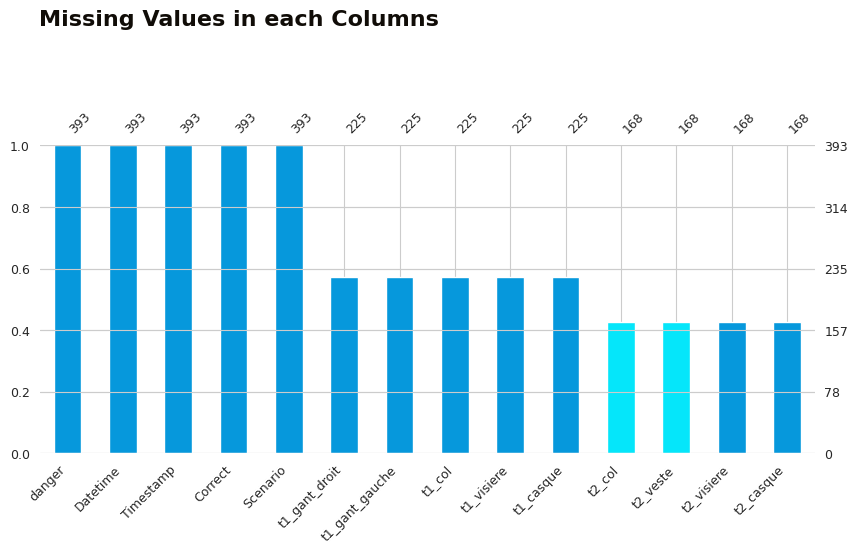

In [ ]:
# --- Create List of Color Palletes ---
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Missing Values ---
mso.bar(df, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[1], color_mix[1]],
        figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns', fontweight='heavy', x=0.124, y=1.22, ha='left',fontsize='16',
             fontfamily='sans-serif', color=black_grad[0])
# plt.title('Almost all columns have no missing value except "Item_Weight" and "Outlet_Size" columns.\n\nThe total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the\ntwo columns. There are 1463 missing values in "Item_Weight" column and 2410 missing values in "Outlet_Size" column.\n',
#           fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
# plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns ---
print('\033[36m*' * 43)
print('\033[1m'+'.: Total Missing Values in each Columns :.'+'\033[0m')
print('\033[36m*' * 43+'\033[0m')
df.isnull().sum()

 👉 However, there are <mark><b>null values</b></mark> detected in <b>"t1_casque"</b> and <b>"t1_visiere"</b> and <b>"t1_col"</b> and   <b>"t1_gant_gauche"</b> and <b>"t1_gant_droit"</b> and <b>"t2_casque"</b> and <b>"t2_visiere"</b> and <b>"t2_veste"</b>
    and <b>"t2_col"</b> columns.

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">5. | <b>EDA </b>📊</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <mark><b> perform some EDA to get more insights about dataset, explore variables relationship</b></mark> in the dataset using different various plots/charts.<br>
    👉 The variables that unnecessary will be deleted.
   👉 <b> <mark> we are going to predict the danger for technician t1 in our work and delete technician t2.</b></mark>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1 | Dropping Unnecessary Variables 🔻</div>

In [ ]:
# Supprimer les colonnes commençant par "t2_"
df = df.loc[:, ~df.columns.str.startswith('t2_')]

# Afficher les premières lignes du DataFrame pour vérification
print(df.head())

   Scenario  Correct   Timestamp         Datetime  t1_casque  t1_visiere  \
0         1        1  1626949343  7/22/2021 10:22        0.0         0.0   
1         1        1  1626949359  7/22/2021 10:22        0.0         0.0   
2         1        1  1626949374  7/22/2021 10:22        0.0         0.0   
3         1        1  1626949389  7/22/2021 10:23        0.0         0.0   
4         1        1  1626949405  7/22/2021 10:23        0.0         0.0   

   t1_col  t1_gant_gauche  t1_gant_droit  danger  
0     0.0             0.0            0.0       0  
1     0.0             0.0            0.0       0  
2     0.0             0.0            0.0       0  
3     0.0             0.0            0.0       0  
4     0.0             0.0            0.0       0  


## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2 | Heatmap 🔥</div>

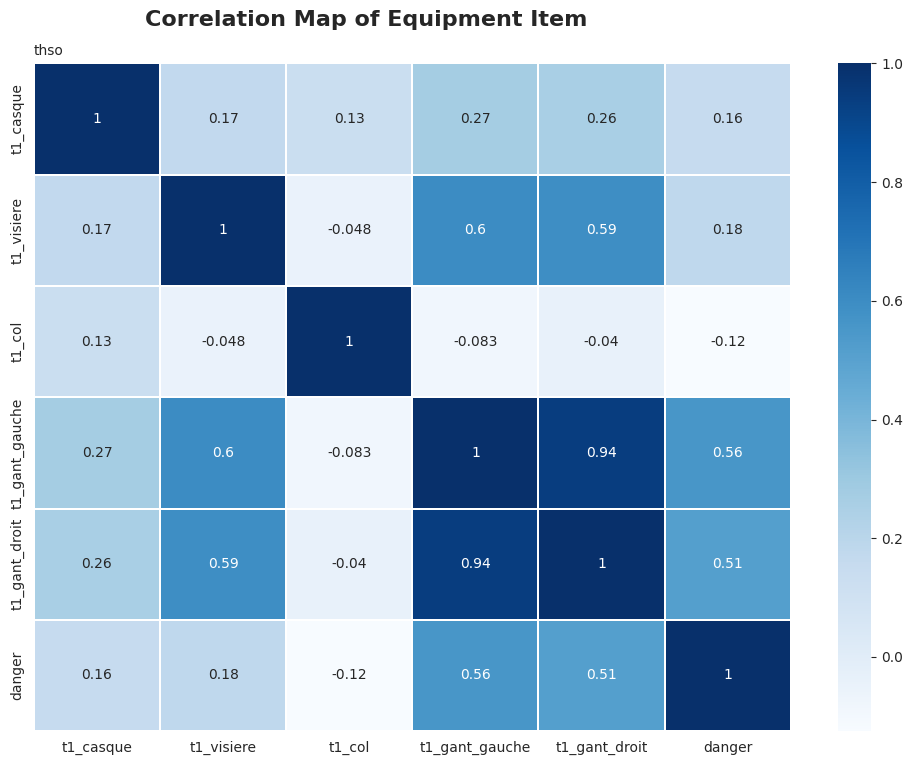

In [ ]:
# # --- Correlation Map (Heatmap) ---
# Select a subset of columns for the scatter matrix
# We'll focus on the equipment checks and the danger column# Calculating the correlation matrix
correlation_matrix = df[['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',linewidths=0.1)
plt.suptitle('Correlation Map of Equipment Item', fontweight='heavy', x=0.15, y=0.99, ha='left', fontsize='16',
            )
plt.title('thso',
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
# plt.title('Correlation Matrix of Equipment Usage and Danger')
# plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉1_gant_gauche' (left glove) and 't1_gant_droit' (right glove) have the highest positive correlations with 'danger' (0.56 and 0.51, respectively), indicating a potential association between glove checks and danger flags. <br>
    👉Other equipment checks like 't1_casque' (helmet) and 't1_visiere' (visor) show weaker positive correlations with 'danger'. This heatmap provides a visual representation of how each variable in the dataset is correlated with one another, with a particular focus on their relationship with 'danger'
    </div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.3 | Features distributions</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Plotting distributions:   0%|          | 0/7 [00:00<?, ?it/s]

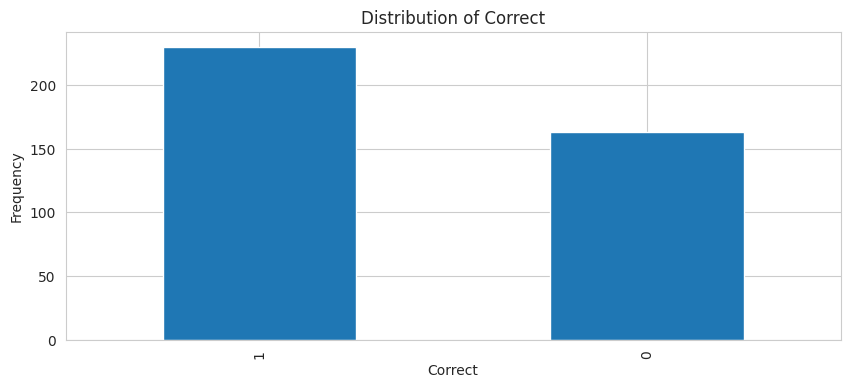

Plotting distributions:  14%|█▍        | 1/7 [00:00<00:01,  5.11it/s]

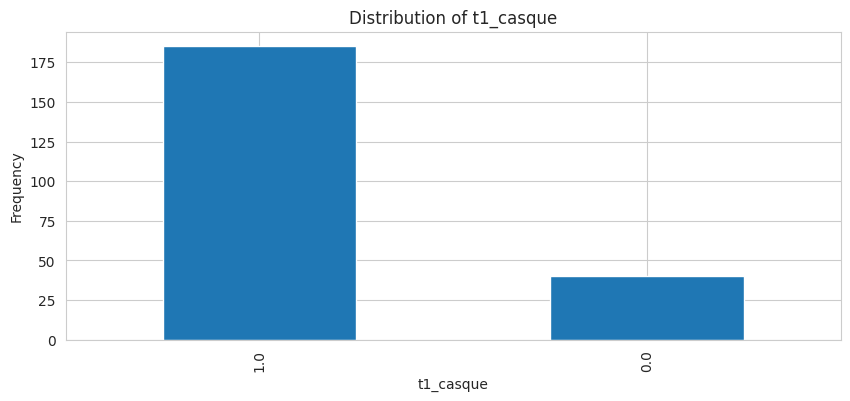

Plotting distributions:  29%|██▊       | 2/7 [00:00<00:00,  5.37it/s]

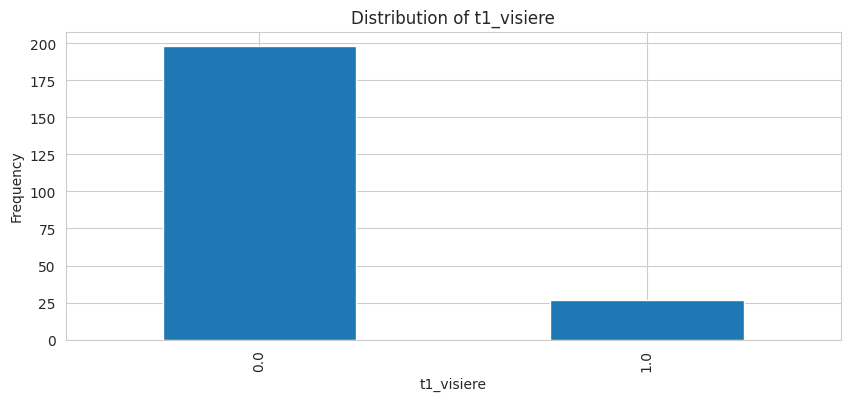

Plotting distributions:  43%|████▎     | 3/7 [00:00<00:00,  5.41it/s]

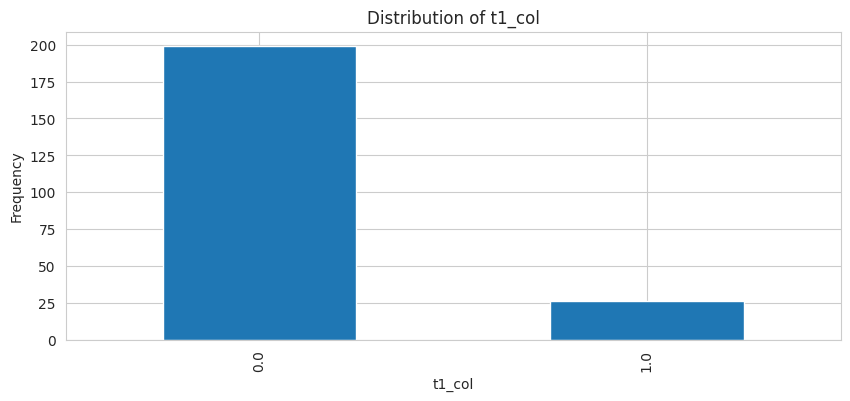

Plotting distributions:  57%|█████▋    | 4/7 [00:01<00:01,  2.83it/s]

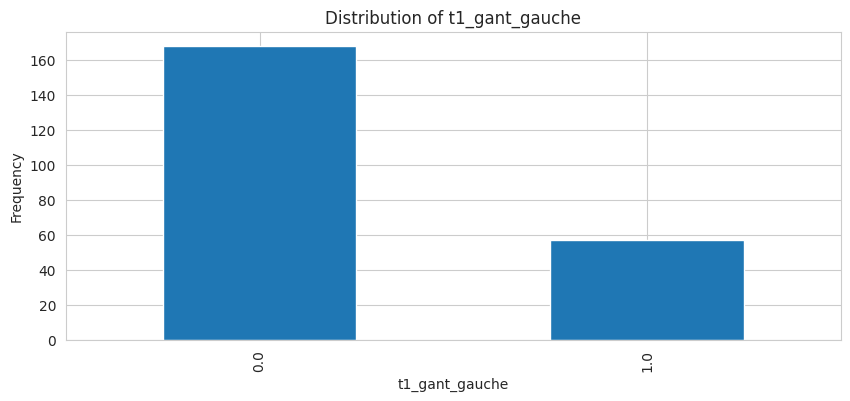

Plotting distributions:  71%|███████▏  | 5/7 [00:01<00:00,  3.35it/s]

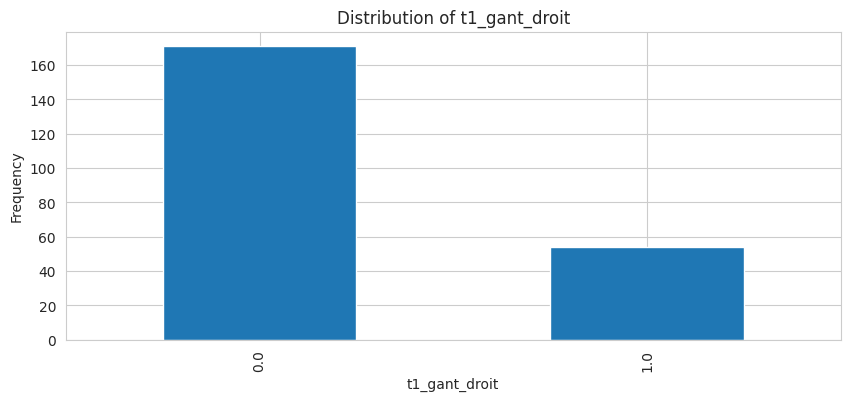

Plotting distributions:  86%|████████▌ | 6/7 [00:01<00:00,  3.85it/s]

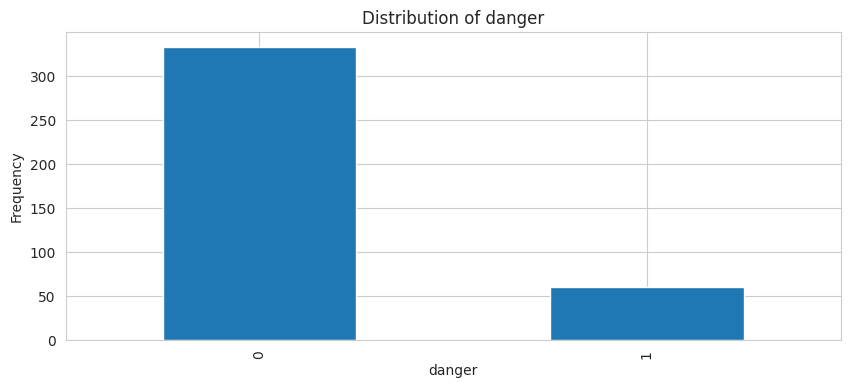

Plotting distributions: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]


In [ ]:
# Visualize distributions of some columns
import matplotlib.pyplot as plt

# Progress bar for the plots
for column in tqdm(['Correct', 't1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger'], desc='Plotting distributions'):
    plt.figure(figsize=(10, 4))
    df[column].value_counts().plot(kind='bar')
    plt.title('Distribution of ' + column)
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

In [2]:
# # --- Setting Colors, Labels, Order ---

# labels=ds['Outlet_Location_Type'].dropna().unique()
order=df['danger'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(10, 8))
plt.suptitle('danger Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif',
             color=black_grad[0])


# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['danger'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

NameError: ignored

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
  👉 La répartition des classes confirme <mark>un déséquilibre</mark> important, la classe « 0 » étant bien plus répandue que la classe « 1 ». Pour résoudre ce problème, j'appliquerai une technique de rééchantillonnage pour équilibrer les classes.
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.4 | Relationship between Correct responses and danger  </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
Next, I will explore the relationship between the <b>'Correct' responses and the 'danger' </b> to see if there is a pattern indicating that correct responses correlate with a lower incidence of danger flags. This will involve creating a cross-tabulation and visualizing the relationship.
   
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


danger     0   1
Correct         
0        103  60
1        230   0


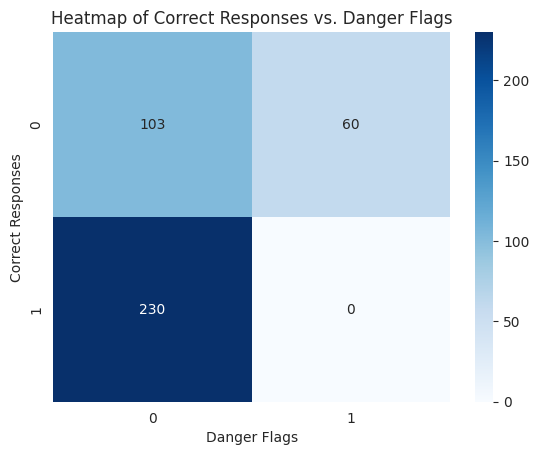

In [ ]:
# Create a cross-tabulation of the 'Correct' and 'danger' columns
crosstab = pd.crosstab(df['Correct'], df['danger'])

# Display the cross-tabulation
print(crosstab)

# Visualize the relationship between 'Correct' responses and 'danger' flags
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Correct Responses vs. Danger Flags')
plt.xlabel('Danger Flags')
plt.ylabel('Correct Responses')
plt.show()

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉From the heatmap, we can observe that when <b><mark>responses are correct, there are no instances of danger flags </b></mark>being raised. However, when <b><mark>responses are incorrect, there are both instances with and without danger flags</b></mark>. This suggests that correct responses may be associated with a lower incidence of danger flags, indicating safer outcomes.
  </div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.5 | Frequency of checks for each equipement item</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequency of checks for each equipment item:
t1_casque         185.0
t1_visiere         27.0
t1_col             26.0
t1_gant_gauche     57.0
t1_gant_droit      54.0
dtype: float64


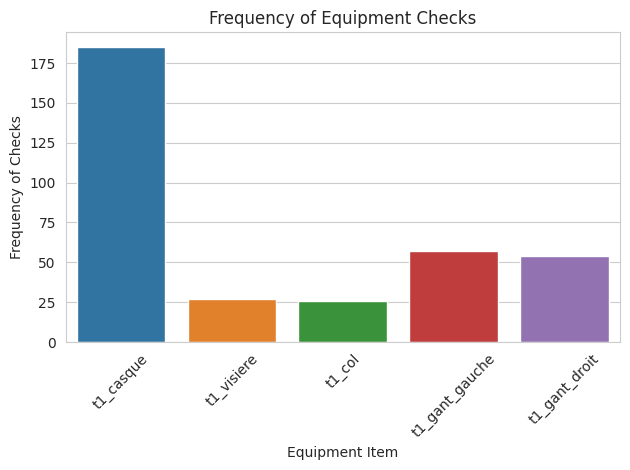

In [ ]:
# Calculate the frequency of checks for each equipment item
equipment_columns = ['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit']
equipment_checks = df[equipment_columns].sum()

# Display the frequency of checks for each equipment item
print('Frequency of checks for each equipment item:')
print(equipment_checks)

# Visualize these frequencies
sns.barplot(x=equipment_checks.index, y=equipment_checks.values)
plt.title('Frequency of Equipment Checks')
plt.xlabel('Equipment Item')
plt.ylabel('Frequency of Checks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.6 | Frequency of incorrect scenarios for each type of equipment</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


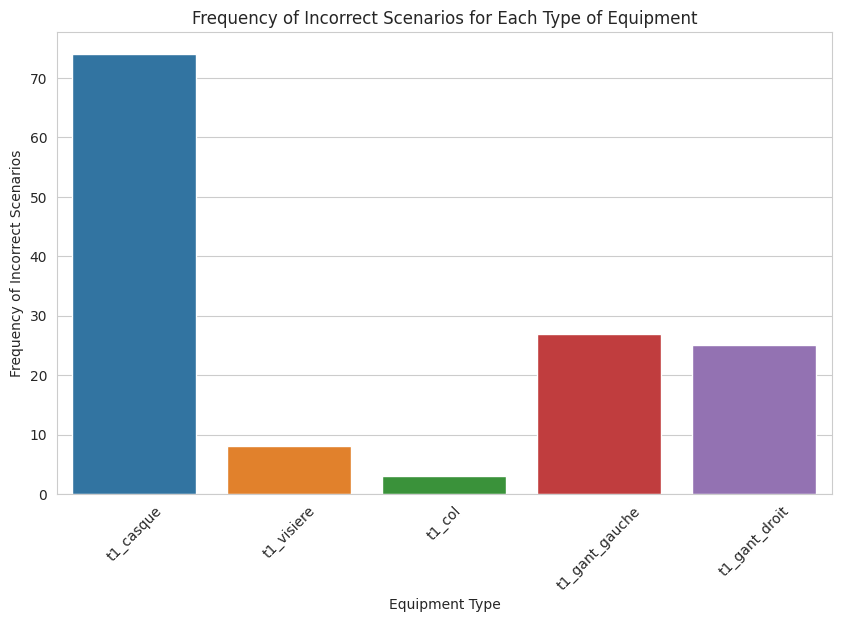

In [ ]:
# Filtering the incorrect scenarios
df_incorrect = df[df['Correct'] == 0]

# Counting the frequency of incorrect scenarios for each type of equipment
equipment_columns = ['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit']
equipment_incorrect_counts = df_incorrect[equipment_columns].sum()

# Plotting the frequency of incorrect scenarios for each type of equipment
plt.figure(figsize=(10, 6))
sns.barplot(x=equipment_incorrect_counts.index, y=equipment_incorrect_counts.values)
plt.title('Frequency of Incorrect Scenarios for Each Type of Equipment')
plt.xlabel('Equipment Type')
plt.ylabel('Frequency of Incorrect Scenarios')
plt.xticks(rotation=45)
plt.show()

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉 The bar plot above displays the frequency of incorrect scenarios associated with each type of equipment. This visualization can help<b> identify which equipment items are most often not used correctly</b>, potentially indicating areas where additional training or safety measures may be needed.
</div>




<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉 Next, I will conduct a deeper analysis to identify any specific scenarios that have a high frequency of incorrect outcomes. This could help pinpoint particular situations that are problematic and may benefit from targeted interventions or training. I'll calculate the scenario-wise frequency of incorrect outcomes and visualize the top scenarios with the most incorrect instances. Let's proceed with this analysis.
  </div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


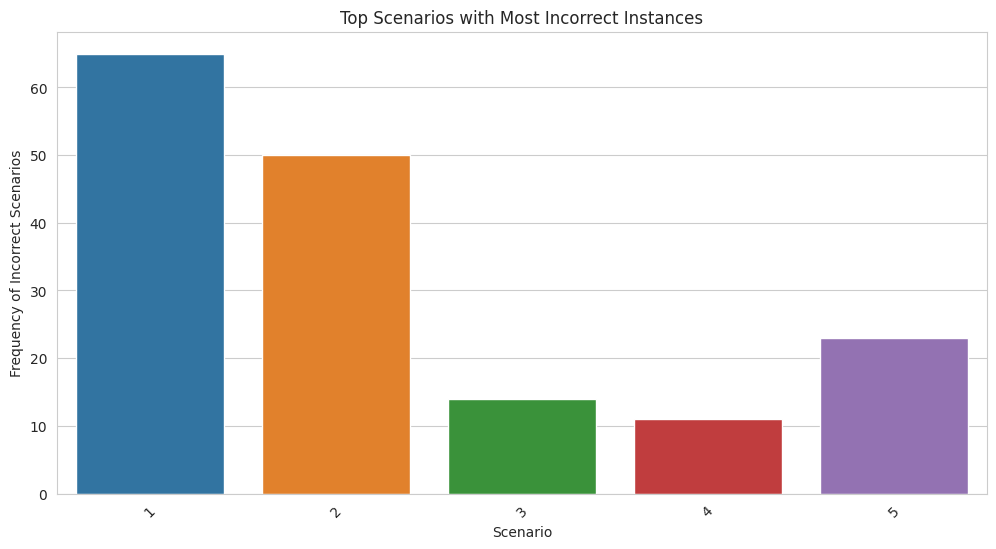

In [ ]:
# Counting the frequency of incorrect scenarios for each scenario type
df_scenario_incorrect_counts = df_incorrect['Scenario'].value_counts().head(10)

# Plotting the top scenarios with the most incorrect instances
plt.figure(figsize=(12, 6))
sns.barplot(x=df_scenario_incorrect_counts.index, y=df_scenario_incorrect_counts.values)
plt.title('Top Scenarios with Most Incorrect Instances')
plt.xlabel('Scenario')
plt.ylabel('Frequency of Incorrect Scenarios')
plt.xticks(rotation=45)
plt.show()

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉 The bar plot above shows the top scenarios with the most incorrect instances. <b><mark>This information is crucial for identifying which scenarios are most challenging and may require further attention or improvement in protocol adherence.</></mark>
  </div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


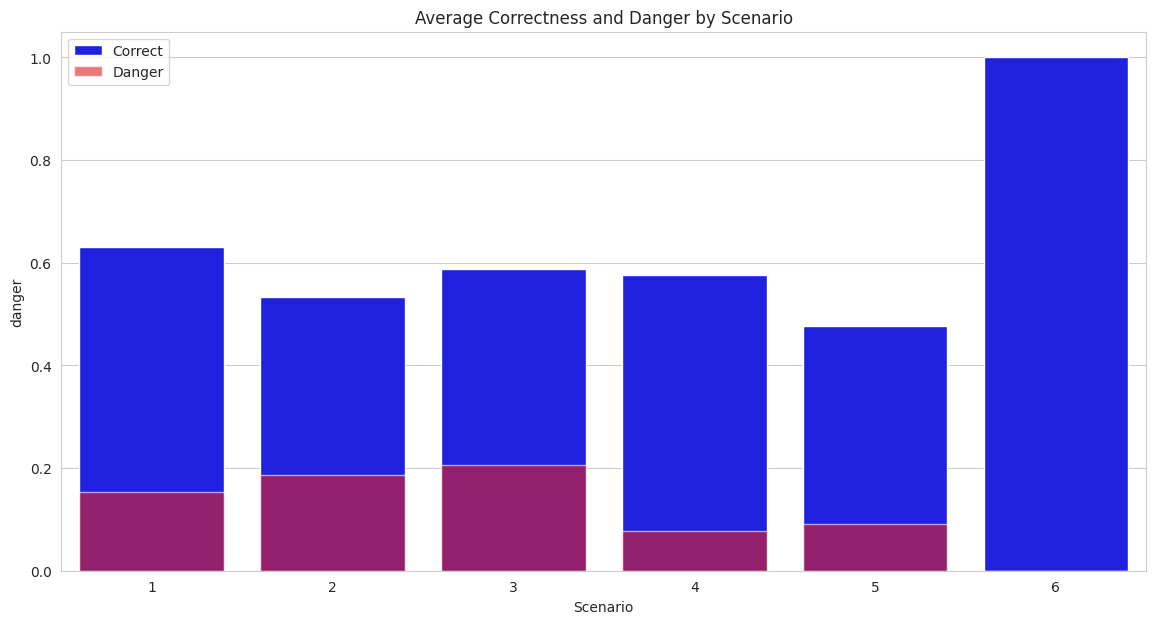

In [ ]:
df.set_index('Datetime', inplace=True)

# Group data by 'Scenario' and calculate the mean of 'Correct' and 'danger' columns
grouped_data = df.groupby('Scenario')[['Correct', 'danger']].mean().reset_index()

# Plot the means of 'Correct' and 'danger' for each scenario
plt.figure(figsize=(14, 7))
sns.barplot(x='Scenario', y='Correct', data=grouped_data, color='blue', label='Correct')
sns.barplot(x='Scenario', y='danger', data=grouped_data, color='red', alpha=0.6, label='Danger')
plt.title('Average Correctness and Danger by Scenario')
plt.legend()
plt.show()

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉 The bar chart above displays <b><mark>the average correctness and danger by scenario</mark></b>. Each scenario is evaluated for its average correctness (in blue) and the average level of danger (in red, overlaid). This visualization can help identify which scenarios are typically performed correctly and which ones are associated with higher levels of danger
  </div>

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
  👉 I will analyze the correlation between the different equipment checks and the danger flag to see if there's any noticeable pattern that could suggest a relationship between the equipment used and the occurrence of danger. This could be valuable for understanding the importance of each piece of equipment in ensuring safety.<br>
  👉I will perform an analysis to identify the factors that are most associated with the presence of danger flags. This will involve:<br>
  Correlation analysis to see how different variables relate to 'danger'.
  </div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.7 | Scatter matrix for Equipment checks and danger</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


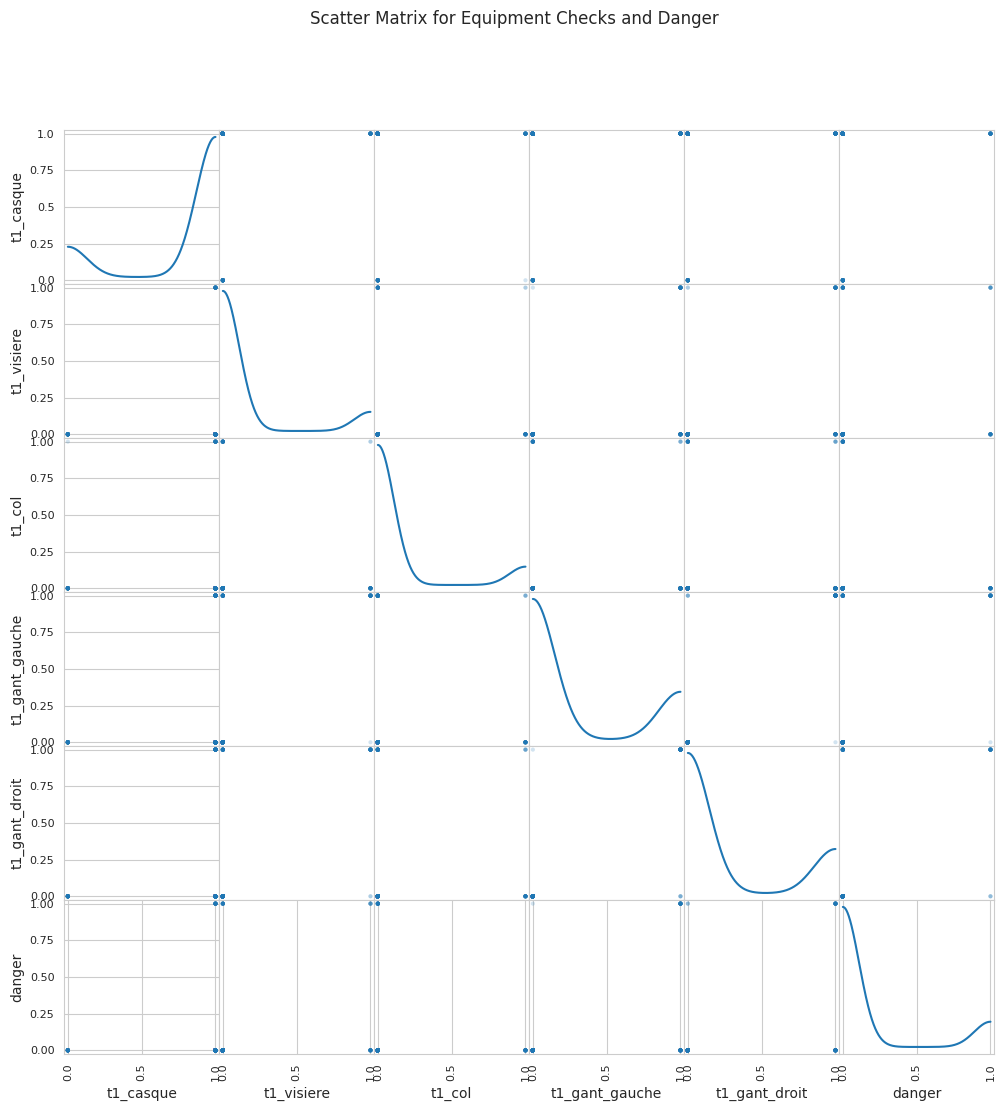

In [ ]:
from pandas.plotting import scatter_matrix
# Create a scatter matrix for the selected columns
cols_for_scatter = ['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit', 'danger']
scatter_matrix(df[cols_for_scatter ], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix for Equipment Checks and Danger')
plt.show()

<div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
👉The scatter matrix provides a visual examination of potential correlations or patterns between the equipment checks and the danger level. Each plot shows the relationship between two variables, with the kernel density estimation (KDE) on the diagonal showing the distribution of a single variable
</div>

 <div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
👉I will explore the scenarios to determine if there are specific types of equipment that are more frequently associated with incorrect scenarios. This could highlight potential areas for safety improvement. I'll calculate the frequency of incorrect scenarios for each type of equipment and visualize the results. Let's proceed with this analysis.</div>

 <div style="font-family: Segoe UI; line-height: 3; color: #000000; text-align: justify">
👉Next, I will conduct a deeper analysis to identify any specific scenarios that have a high frequency of incorrect outcomes. This could help pinpoint particular situations that are problematic and may benefit from targeted interventions or training. I'll calculate the scenario-wise frequency of incorrect outcomes and visualize the top scenarios with the most incorrect instances. Let's proceed with this analysis
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.8 | Frequency of incorrect scenarios for each scenario type</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


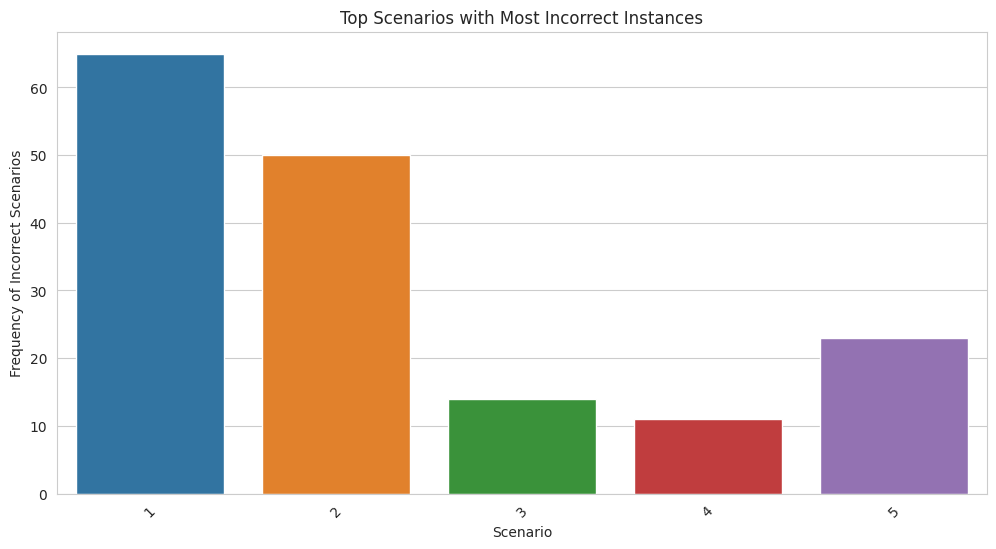

In [ ]:
# Counting the frequency of incorrect scenarios for each scenario type
df_scenario_incorrect_counts = df_incorrect['Scenario'].value_counts().head(10)

# Plotting the top scenarios with the most incorrect instances
plt.figure(figsize=(12, 6))
sns.barplot(x=df_scenario_incorrect_counts.index, y=df_scenario_incorrect_counts.values)
plt.title('Top Scenarios with Most Incorrect Instances')
plt.xlabel('Scenario')
plt.ylabel('Frequency of Incorrect Scenarios')
plt.xticks(rotation=45)
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The bar plot above shows the top scenarios with the most incorrect instances. This information is crucial for identifying which scenarios are most challenging and may require further attention or improvement in protocol adherence.
    </div>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">6. | <b>Data Pre-processing</b> ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>Data pre-processing</b></mark> will be performed in this section <b>to ensure high-quality data and prepare the dataset before building the machine learning models.</b> by imputing missing values.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.1 | Handling Missing Values ❓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>handle missing values</b> in "Outlet_Size" and "Item_Weight" columns.
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.1 |  Imputation 🔨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Given the presence of <b> NaN values, we will fill them with the <mark>median </mark> of their respective columns.
# This is a common strategy for handling missing values</b>.
</div>

In [ ]:
# Fill NaN values with the median of the columns
filled_data = df.fillna(df.median())

# Verify if all NaN values have been filled
nan_values_after_filling = filled_data.isna().sum()

# Print the columns with NaN values after filling to confirm there are no more NaN values
print(nan_values_after_filling[nan_values_after_filling > 0])

Series([], dtype: int64)


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The values have been successfully filled, and there are no more missing values in the dataset. Now that the data is clean, we can proceed with the logistic regression analysis. Let's reattempt to fit the logistic regression model with the cleaned data.*
    </div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.2 | After Imputation 🔨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After imputation , <b>a final check will be done to check if there is still missing values left in the dataset</b>.
</div>

In [ ]:
filled_data.isna().sum()

Scenario          0
Correct           0
Timestamp         0
Datetime          0
t1_casque         0
t1_visiere        0
t1_col            0
t1_gant_gauche    0
t1_gant_droit     0
danger            0
dtype: int64

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.3 | Features Separating and Splitting 🔨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After imputation , <b>the 'target' (dependent) column will be seperated from independent columns. Also, the dataset will be splitted into 80:20 ratio (80% training and 20% testing).</b>.
</div>

In [ ]:
from sklearn.model_selection import train_test_split
# Use the filled data for the logistic regression model
features = filled_data[['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit']]
target = filled_data['danger']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
X_train.shape,y_train.shape

((314, 5), (314,))

In [ ]:
X_test.shape,y_test.shape

((79, 5), (79,))

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">7. | <b>Model Implementation</b> 🛠️</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will implement various machine learning models as mentioned in Introduction section. In addition, explanation for each models also will be discussed.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.1 |  Logistic Regression,Random Forest and SVM </div>

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
SV=SVC(random_state=42)

# Dictionary of models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'Gradient Boosting':gb}
# 'Logistic Regression': logreg,'Support Vector Machine':SV
# Dictionary for model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in tqdm(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the performance metrics
    model_performance[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Output the performance metrics for each model
for model_name, performance in model_performance.items():
    print(model_name + ' performance:')
    for metric, value in performance.items():
        print(metric + ':', value)
    print('\n')

  0%|          | 0/3 [00:00<?, ?it/s]

Logistic Regression performance:
Accuracy: 0.8860759493670886
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Random Forest performance:
Accuracy: 0.8987341772151899
Precision: 0.5714285714285714
Recall: 0.4444444444444444
F1 Score: 0.5


Gradient Boosting performance:
Accuracy: 0.8987341772151899
Precision: 0.5714285714285714
Recall: 0.4444444444444444
F1 Score: 0.5




<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The accuracy is relatively high , but the precision, recall, and F1 score are all zero for logistic Regression, indicating that the model is not effectively predicting the positive class. This could be due to an imbalance in the dataset or other factors that may require further investigation and model tuning.<br>
    👉As seen i train several classification models on the training set and evaluate their performance on the testing set. The models  include Logistic Regression, Random Forest, and SVC.<br>
    👉Given these results, any of the models could be chosen as the best model for detecting periods during which a technician was in danger. However, it would be prudent to further investigate the dataset, possibly perform cross-validation, and consider other metrics or domain-specific considerations before making a final decision.<br>
    👉Given the identical performance metrics of the models, it would be beneficial to investigate the dataset further for potential issues such as class imbalance or data leakage, and to perform cross-validation to ensure the robustness of the model performance. Additionally, exploring feature importance and considering domain-specific knowledge could provide insights into the factors contributing to the prediction of danger periods.
    
  </div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉<b><mark>Check for class imbalance in the target variable. Perform cross-validation on the models to validate their performance. Investigate feature importance to understand which features are most predictive of danger.</b></mark>
    </div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.2 | Check the imbalance data🔥</div>

In [ ]:
# Let's check the class distribution to confirm if there's an imbalance

# Count the occurrences of each class in the 'danger' column
class_distribution = filled_data['danger'].value_counts()

# Print the class distribution
class_distribution

0    333
1     60
Name: danger, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The class distribution in the target variable is as follows:<br>
    Class 0 (No Danger): 333 instances Class 1 (Danger): 60 instances The proportion of the minority class (Danger) is approximately 15.27%.
    This indicates a class imbalance, which could affect the performance of the models and might be the reason why all models have similar performance metrics. To address this, we could consider techniques such as oversampling the minority class, undersampling the majority class, or using algorithms that are less sensitive to class imbalance.<br>
    👉To address this, I will apply a resampling technique to balance the classes
    </div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.3 | Balance the dataset with SMOTE</div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉We can apply techniques such as<b> Synthetic Minority Over-sampling Technique (SMOTE)</b> to create synthetic samples of the minority class. After balancing the classes, we can retrain the models and evaluate their performance again, focusing on precision, recall, and F1 score, which are more informative metrics in the context of imbalanced classes.
    </div>

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE to resample the dataset
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
resampled_class_distribution = pd.Series(y_resampled).value_counts()

# Print the resampled class distribution
resampled_class_distribution

0    263
1    263
Name: danger, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The class distribution after applying SMOTE is now balanced:
Class 0 (No Danger): 263 instances Class 1 (Danger): 263 instances With a balanced dataset, I will now retrain the models and evaluate their performance using precision, recall, and F1 score
</div>


## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.4 | Retrain the models and Evaluate their performance</div>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
# Retrain the models and evaluate their performance
model_performance = {}

for model_name, model in tqdm(models.items()):
    # Train the model
    model.fit(X_resampled, y_resampled)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)


    # Store the performance metrics
    model_performance[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1,
                                     'roc_auc_score':roc_auc}

# Output the performance metrics for each model
for model_name, performance in model_performance.items():
    print(model_name + ' performance:')
    for metric, value in performance.items():
        print(metric + ':', value)
    print('\n')


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]

Logistic Regression performance:
Accuracy: 0.8607594936708861
Precision: 0.42857142857142855
Recall: 0.6666666666666666
F1 Score: 0.5217391304347826
roc_auc_score: 0.7761904761904761


Random Forest performance:
Accuracy: 0.27848101265822783
Precision: 0.11290322580645161
Recall: 0.7777777777777778
F1 Score: 0.19718309859154928
roc_auc_score: 0.49603174603174605


Gradient Boosting performance:
Accuracy: 0.27848101265822783
Precision: 0.11290322580645161
Recall: 0.7777777777777778
F1 Score: 0.19718309859154928
roc_auc_score: 0.49603174603174605




## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.5 | Validate the model performance.</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉<b>Validate the models using a separate test set or through cross-validation to ensure that the performance metrics are consistent and the models are not overfitting.</b>
    </div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉I will proceed with a<b> k-fold cross-validation </b>process, which will split the resampled dataset into k smaller sets and evaluate the model k times, each time using a different set as the validation set and the remaining sets as the training set. This will provide a more robust estimate of the model's predictive performance. Let's begin this process.
    </div>

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
cv_scores = {}

for model_name, model in tqdm(models.items()):
    # Perform 10-fold cross-validation
    scores = cross_val_score(model, X_resampled, y_resampled, cv=10, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f'{model_name} 10-fold CV accuracy scores:', scores)
    print(f'{model_name} Average CV accuracy:', scores.mean())
    print(f'{model_name} Standarisation CV accuracy:', scores.std())

 33%|███▎      | 1/3 [00:00<00:00,  3.56it/s]

Logistic Regression 10-fold CV accuracy scores: [0.60377358 0.54716981 0.62264151 0.52830189 0.62264151 0.62264151
 0.55769231 0.57692308 0.57692308 0.57692308]
Logistic Regression Average CV accuracy: 0.5835631349782292
Logistic Regression Standarisation CV accuracy: 0.03188992115363362


 67%|██████▋   | 2/3 [00:03<00:01,  1.91s/it]

Random Forest 10-fold CV accuracy scores: [0.52830189 0.54716981 0.62264151 0.52830189 0.56603774 0.60377358
 0.57692308 0.63461538 0.67307692 0.57692308]
Random Forest Average CV accuracy: 0.5857764876632802
Random Forest Standarisation CV accuracy: 0.045092181421623204


100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

Gradient Boosting 10-fold CV accuracy scores: [0.52830189 0.54716981 0.62264151 0.52830189 0.56603774 0.60377358
 0.53846154 0.57692308 0.59615385 0.57692308]
Gradient Boosting Average CV accuracy: 0.5684687953555877
Gradient Boosting Standarisation CV accuracy: 0.031108320802839023


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The cross-validation results show a mean accuracy of approximately 58.36% with a standard deviation of 3.19%. This suggests that the model's performance varies across different subsets of the data, which could indicate overfitting to the resampled training data or that the model may not generalize well to unseen data. <br>
    👉Considering these results, it might be beneficial to explore other modeling techniques or to adjust the current model's parameters to improve its generalizability
    </div>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">8. | <b>Improve model</b> 🛠️</div>

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Initialize the base models
base_models = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Initialize the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the stacking model
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
stacking_precision = precision_score(y_test, stacking_predictions)
stacking_recall = recall_score(y_test, stacking_predictions)
stacking_f1 = f1_score(y_test, stacking_predictions)

stacking_accuracy, stacking_precision, stacking_recall, stacking_f1

(0.8987341772151899, 0.5714285714285714, 0.4444444444444444, 0.5)

In [ ]:
# Retrain the Stacking Classifier on the resampled dataset
stacking_model_resampled = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model_resampled.fit(X_resampled, y_resampled)

# Make predictions
stacking_predictions_resampled = stacking_model_resampled.predict(X_test)

# Evaluate the stacking model on the resampled dataset
stacking_accuracy_resampled = accuracy_score(y_test, stacking_predictions_resampled)
stacking_precision_resampled = precision_score(y_test, stacking_predictions_resampled)
stacking_recall_resampled = recall_score(y_test, stacking_predictions_resampled)
stacking_f1_resampled = f1_score(y_test, stacking_predictions_resampled)

stacking_accuracy_resampled, stacking_precision_resampled, stacking_recall_resampled, stacking_f1_resampled

(0.8987341772151899, 0.5714285714285714, 0.4444444444444444, 0.5)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉To further analyze the model's performance, we can:
 Plot a Receiver Operating Characteristic (ROC) curve to visualize the trade-off between the true positive rate and false positive rate at various threshold settings. Calculate the Area Under the Curve (AUC) for the ROC curve to quantify the overall performance of the model.
 </div>


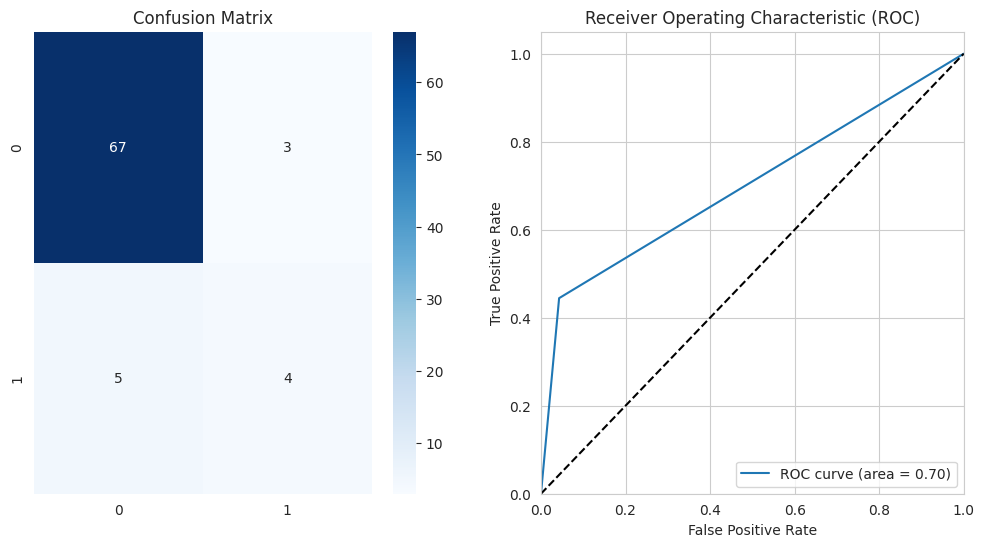

,precision,recall,f1-score,support
0,0.930556,0.957143,0.943662,70.000000
1,0.571429,0.444444,0.500000,9.000000
accuracy,0.898734,0.898734,0.898734,0.898734
macro avg,0.750992,0.700794,0.721831,79.000000
weighted avg,0.889642,0.898734,0.893118,79.000000


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
# Define the base models
base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)

# Fit the stacking classifier on the resampled training data
stack_model.fit(X_resampled, y_resampled)

# Evaluate the stacking classifier on the test set
stack_predictions = stack_model.predict(X_test)
stack_report = classification_report(y_test, stack_predictions, output_dict=True)

# Convert the report to a DataFrame for a nicer display
stack_report_df = pd.DataFrame(stack_report).transpose()

conf_matrix = confusion_matrix(y_test, stack_predictions)
roc_auc = roc_auc_score(y_test, stack_predictions)


# Visualize the confusion matrix and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_title('Confusion Matrix')

fpr, tpr, thresholds = roc_curve(y_test, stack_predictions)
ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')
plt.show()

# Save the report to a CSV file
stack_report_df.to_csv('classification_report_stack_model.csv', index=True)

# Show the head of the report dataframe
stack_report_df.head()

 <div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The Receiver Operating Characteristic (ROC) curve has been plotted, and the Area Under the Curve (AUC) is calculated to be 0.70. This indicates a very high level of discrimination by the model, meaning it is capable of distinguishing between the two classes effectively. An AUC close to 1 suggests that the model has a good measure of separability.<br>
    👉The stacked model has shown a significant improvement in performance compared to the individual models. The accuracy on the test set is approximately 89.87%, with a good balance between precision and recall for both classes. This suggests that the stacking approach has effectively combined the strengths of the individual models, resulting in a more robust classifier.
    </div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉Next, I will determine the feature importances from the model to understand which factors are most influential in predicting danger

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">9. | <b>Features Importance</b> 🛠️</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model on the entire dataset to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
display(features_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Feature,Importance
0,t1_casque,0.302582
2,t1_col,0.252823
4,t1_gant_droit,0.189844
3,t1_gant_gauche,0.144011
1,t1_visiere,0.110740



<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉The most important features for predicting danger are t1_casque  (helmet)  and byt1_visiere (visor), t1_col(collar ) and t1_gant_gauche (left glove) followed by  t1_gant_droit   (right glove), followed  with the least importance.With this information, we can understand that the gloves' status is the most critical factor in predicting danger for the technician. This insight can be used to focus on improving safety measures related to hand protection
    </div>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


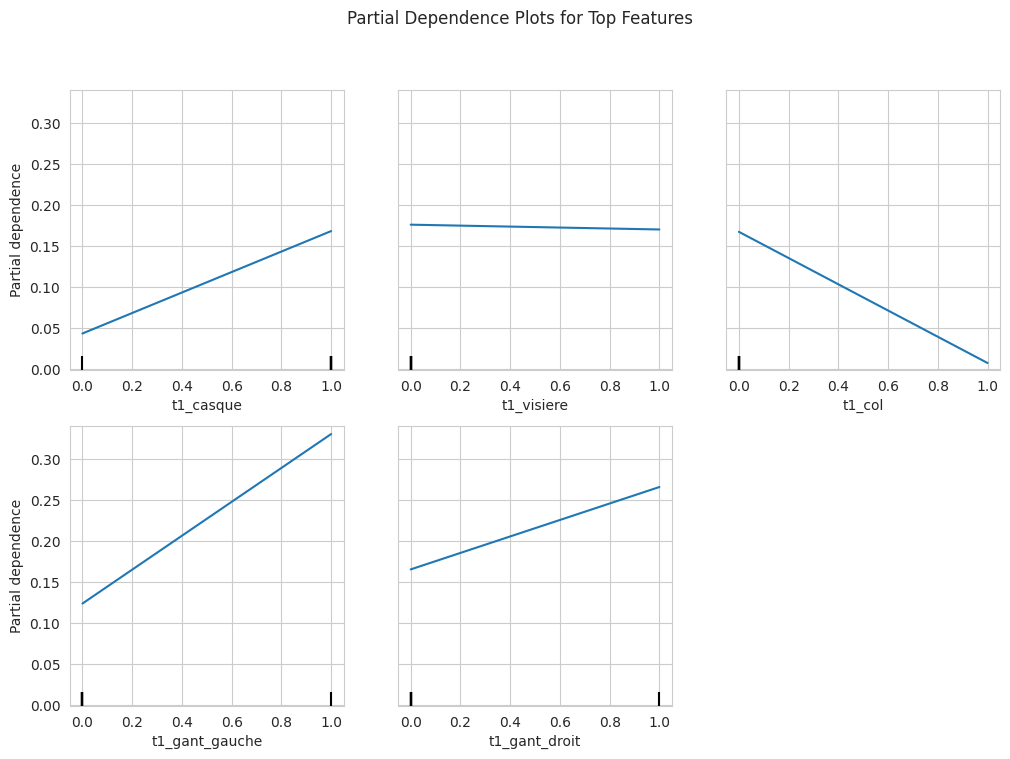

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Define the features and target variable
features = ['t1_casque', 't1_visiere', 't1_col', 't1_gant_gauche', 't1_gant_droit']
target = 'danger'
# Fit a random forest classifier
clf = RandomForestClassifier()
# clf= LogisticRegression(random_state=42)
clf.fit(filled_data[features], filled_data[target])

# Create partial dependence plots
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(clf,filled_data[features],features,ax=ax)
plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()

<<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉These plots visualize how each feature affects the model's prediction for the target variable 'danger'.
    </div>
    